In [ ]:
import pandas as pd
import numpy as np

First I put the data in **pandas dataframe** format to make working with it easier.
For each point, I put its x and y coordinates in seperated columns as the features.
I give the red dots labels of 1 and the blue dots labels of 0 as below:

In [22]:
data = {'x':[0, 1, 1, 2, 2, 3, 3, 2, 2.5, 3],
        'y':[0, 1, -1, 2, -2, 3, -3, 0, 0, 0],
        'label':[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
        }
df = pd.DataFrame(data,columns=['x','y','label'])

I split the data into train and test:

In [23]:
mask = np.random.rand(len(df)) <= 0.8
training_data = df[mask]
testing_data = df[~mask]
target_output = df.label

I define the **sigmoid** function and its derivative as below:

In [24]:
def sigmoid(x):
    return(1.0/(1 + np.exp(-x)))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

I define the **learning rate** and the **number of nodes** in the input layer and the hidden layer (I put 2 nodes in each layer), and number of epochs as below.


I then define the matrices for weights of each layer. I have a 2x2 matrix for conncetions between the input layer and the hidden layer, and 1x2 matrix for conncetions between the hidden layer and output layer.


I initialize the matrices with values from **standard normal distribution** as below:

In [33]:
learning_rate = 0.1   

Input_layer_dim = 3
Hidden_layer_dim = 2

num_epoch = 1

weights_first_layer = np.random.normal(0, 1, (Input_layer_dim, Hidden_layer_dim))
weights_second_layer = np.random.normal(0, 1, Hidden_layer_dim)

z_hidden_layer = np.zeros(Hidden_layer_dim)
y_hidden_layer = np.zeros(Hidden_layer_dim)

I traverse the neural network for the number of epochs I defined.


I first implement **feed forward**: each time, I calculate the output node’s z signal (dot of inputs with wights) and the y signal (sigmoid of z) for each sample.


Then I implement **back propagation** to update the w's for the second and first layers as below:

In [34]:
for epoch in range(num_epoch):
    for sample in range(len(training_data)):
        inputs = [training_data['x'].values[sample], training_data['y'].values[sample],1]
        for node in range(Hidden_layer_dim):
            z_hidden_layer[node] = np.dot(inputs, weights_first_layer[:, node])
            y_hidden_layer[node] = sigmoid(z_hidden_layer[node])
            
        z_output_layer = np.dot(y_hidden_layer, weights_second_layer)
        y_output_layer = sigmoid(z_output_layer)
        
        FE = y_output_layer - target_output[sample]
        
        for Hidden_node in range(Hidden_layer_dim):
            gradient = FE * sigmoid_deriv(z_output_layer) * y_hidden_layer[Hidden_node]
                       
            for Input_node in range(Input_layer_dim):
                if (Input_node == 0):
                    input_value = training_data['x'].values[sample]
                else:
                    input_value = training_data['y'].values[sample]
                gradient_first_layer = FE * sigmoid_deriv(z_output_layer) * weights_second_layer[Hidden_node] * sigmoid_deriv(z_hidden_layer[Hidden_node]) * input_value
                
                weights_first_layer[Input_node, Hidden_node] -= learning_rate * gradient_first_layer
                
            weights_second_layer[Hidden_node] -= learning_rate * gradient


Now that I have the updated w's, I test the algorithm with the test data, and calculate the **precision** as below:

In [35]:
correct_classification_count = 0
for sample in range(len(testing_data)):
    inputs = [training_data['x'].values[sample], training_data['y'].values[sample],1]
    for node in range(Hidden_layer_dim):
        z_hidden_layer[node] = np.dot(inputs, weights_first_layer[:, node])
        y_hidden_layer[node] = sigmoid(z_hidden_layer[node])
            
    z_output_layer = np.dot(y_hidden_layer, weights_second_layer)
    y_output_layer = sigmoid(z_output_layer)
        
    if y_output_layer > 0.5:
        output = 1
    else:
        output = 0     
        
    if output == testing_data['label'].values[sample]:
        correct_classification_count += 1

print('Percentage of correct classifications:')
print(correct_classification_count*100/len(testing_data))

Percentage of correct classifications:
100.0


The classifying hyperplanes can be plotted using **matplotlib** as below:

[[ 0.10062437  0.30597003]
 [-0.83237308 -0.46497596]
 [ 0.3559019  -0.23695033]]


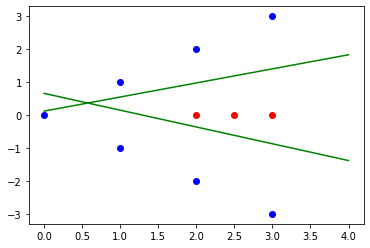

In [36]:
import matplotlib.pyplot as plt
x_red = [2, 2.5, 3]
y_red = [0, 0, 0]
x_blue = [0, 1, 1, 2, 2, 3, 3]
y_blue = [0, 1, -1, 2, -2, 3, -3]
plt.scatter(x_red,y_red,color='red')
plt.scatter(x_blue,y_blue,color='blue')
print(weights_first_layer)
x = np.linspace(0,4)
y1 = -1*(weights_first_layer[2][0] * x + weights_first_layer[0][0]) / weights_first_layer[1][0]
y2 = -1*(weights_first_layer[2][1] * x + weights_first_layer[0][1]) / weights_first_layer[1][1]
plt.plot(x,y1,color='green')
plt.plot(x,y2,color='green')

